# Angani Sales Data Analysis

# Business Understanding

Description Here

# Business Problem 

Description Here

# Data Understanding 

Description Here

In [88]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore



In [89]:

df = pd.read_excel(r"C:\Users\ELITEBOOK 840 G3\Documents\moringa_labs\Angani project\Angani_Sales_Data_Analysis/Salesdata.xlsx", sheet_name="Main Data")


In [90]:
# Summary statistics
df.describe()

,OrderNumber,QuantityOrdered,PriceEach,OrderLineNumber,Sales,QTR_ID,DAY_ID,MONTH_ID,YEAR_ID,CostPrice
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,14.291534,7.092455,2022.81509,54.378054
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,8.777409,3.656633,0.69967,13.113280
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,1.000000,2022.00000,17.472000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,6.000000,4.000000,2022.00000,44.759000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,14.000000,8.000000,2023.00000,62.205000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,21.000000,11.000000,2023.00000,65.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,31.000000,12.000000,2024.00000,65.000000


In [91]:
# Display column names to verify the exact name
print("Columns in DataFrame:", df.columns)


Columns in DataFrame: Index(['OrderNumber', 'QuantityOrdered', 'PriceEach', 'OrderLineNumber',
       'Sales', 'Status', 'QTR_ID', 'DAY_ID', 'MONTH_ID', 'YEAR_ID',
       'ProductCode', 'CustomerName', 'Phone', 'AddressLine1', 'City',
       'PostalCode', 'Country', 'Territory', 'ContactLastName',
       'ContactFirstName', 'Branch', 'CostPrice'],
      dtype='object')


### Check missing values

In [92]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 OrderNumber            0
QuantityOrdered        0
PriceEach              0
OrderLineNumber        0
Sales                  0
Status                 0
QTR_ID                 0
DAY_ID                 0
MONTH_ID               0
YEAR_ID                0
ProductCode            0
CustomerName           0
Phone                  0
AddressLine1           0
City                   0
PostalCode            76
Country                0
Territory           1074
ContactLastName        0
ContactFirstName       0
Branch                 0
CostPrice              0
dtype: int64


In [93]:
# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)


Percentage of missing values in each column:
 OrderNumber          0.000000
QuantityOrdered      0.000000
PriceEach            0.000000
OrderLineNumber      0.000000
Sales                0.000000
Status               0.000000
QTR_ID               0.000000
DAY_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
ProductCode          0.000000
CustomerName         0.000000
Phone                0.000000
AddressLine1         0.000000
City                 0.000000
PostalCode           2.692171
Country              0.000000
Territory           38.044633
ContactLastName      0.000000
ContactFirstName     0.000000
Branch               0.000000
CostPrice            0.000000
dtype: float64


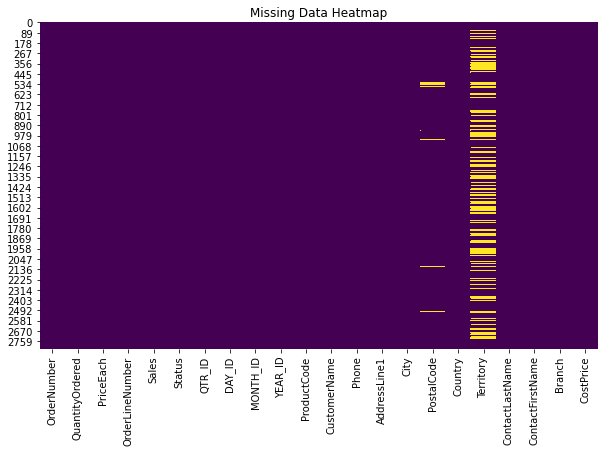

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [95]:
import plotly.graph_objects as go

# Create a boolean DataFrame where True represents missing values
missing_data = df.isnull()

# Convert boolean DataFrame to integers (1 for missing, 0 for present)
missing_data = missing_data.astype(int)

# Create a heatmap with Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=missing_data.T,  # Transpose to have columns on y-axis
        x=missing_data.index,
        y=missing_data.columns,
        colorscale='Viridis',  # Color scale similar to Seaborn's 'viridis'
        showscale=True,
        colorbar_title="Missing (1) / Present (0)"
    )
)

# Add title and show the interactive heatmap
fig.update_layout(
    title="Missing Data Heatmap",
    xaxis_title="Row Index",
    yaxis_title="Columns"
)

fig.show()


In [96]:
# Display rows with any missing values
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:\n", missing_rows)


Rows with missing values:
       OrderNumber  QuantityOrdered  PriceEach  OrderLineNumber    Sales  \
0           10100               49      34.47                1  1689.03   
1           10100               50      67.80                2  3390.00   
2           10100               30     100.00                3  5151.00   
3           10100               22      86.51                4  1903.22   
8           10102               41      50.14                1  2055.74   
...           ...              ...        ...              ...      ...   
2742        10414               48     100.00               14  5808.48   
2795        10421               35     100.00                1  5433.75   
2796        10421               40      45.70                2  1828.00   
2797        10422               25      51.75                1  1293.75   
2798        10422               51      95.55                2  4873.05   

          Status  QTR_ID  DAY_ID  MONTH_ID  YEAR_ID  ...       Phone  \


In [98]:
# Standardize column names by stripping extra spaces and making them lowercase
df.columns = df.columns.str.strip().str.lower()

# Check column names again to confirm they are standardized
print("Standardized Column names:", df.columns)


Standardized Column names: Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'status', 'qtr_id', 'day_id', 'month_id', 'year_id',
       'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'territory', 'contactlastname',
       'contactfirstname', 'branch', 'costprice'],
      dtype='object')


### Univariate Analysis

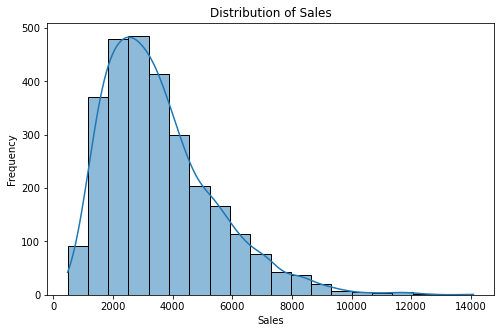

In [99]:
# Adjust to use standardized column name
if 'sales' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df['sales'].dropna(), bins=20, kde=True)
    plt.title("Distribution of Sales")
    plt.xlabel("Sales")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'sales' not found after standardization.")


In [100]:
import plotly.express as px

# Check if 'sales' column exists
if 'sales' in df.columns:
    # Plot histogram with Plotly
    fig = px.histogram(
        df,
        x='sales',
        nbins=20,  # Number of bins
        title="Distribution of Sales",
        labels={'sales': 'Sales Amount'},
    )

    # Add KDE (density curve)
    fig.update_traces(opacity=0.75)  # Adjust bar opacity for better view of KDE

    # Show the interactive plot
    fig.show()
else:
    print("Column 'sales' not found after standardization.")


In [101]:
# Rename columns (for example, if you found the actual name to be 'Amount Sold')
df.rename(columns={'Amount Sold': 'sales'}, inplace=True)

# Verify the renaming
print("Columns after renaming:", df.columns)


Columns after renaming: Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'status', 'qtr_id', 'day_id', 'month_id', 'year_id',
       'productcode', 'customername', 'phone', 'addressline1', 'city',
       'postalcode', 'country', 'territory', 'contactlastname',
       'contactfirstname', 'branch', 'costprice'],
      dtype='object')


c:\Users\ELITEBOOK 840 G3\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



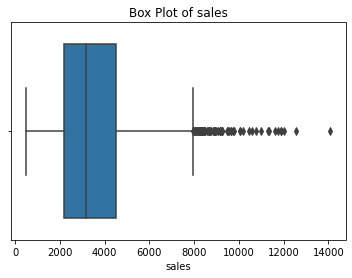

In [102]:
# Box plot for sales amount to check for outliers
plt.figure(figsize=(6, 4))
sns.boxplot(df['sales'])
plt.title("Box Plot of sales")
plt.show()


In [103]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame and it contains a 'sales' column
df = pd.DataFrame({'sales': [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 800, 1000, 1500]})  # Example data

# Create the box plot
fig = px.box(df, y='sales', title="Box Plot of sales")

# Show the plot
fig.show()


### Bivariate Analysis

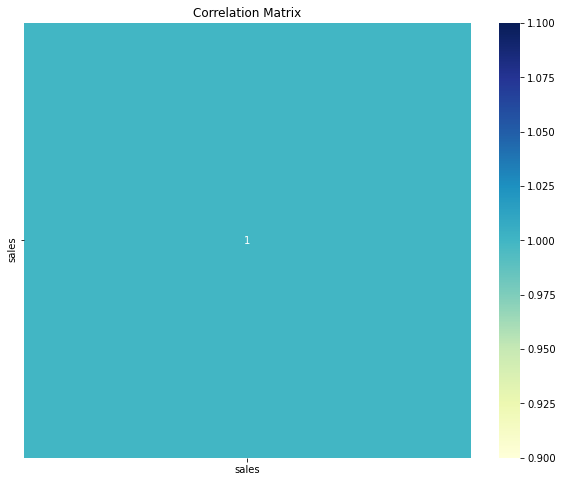

In [104]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


In [107]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

# Sample DataFrame creation (Replace this with your actual data)
# Example data: You can customize this DataFrame with your actual data
data = {
    'sales': [100, 150, 200, 250, 300],
    'Customer ID': [1, 1, 2, 2, 3],
    'Month': [1, 1, 2, 2, 3],
    'Day of Week': [0, 1, 2, 3, 4]  # Assume 0=Monday, 1=Tuesday, ..., 6=Sunday
}
df = pd.DataFrame(data)

# Calculate the correlation matrix
corr = df.corr()

# Create the heatmap using Plotly
fig = ff.create_annotated_heatmap(z=corr.values,
                                    x=corr.columns.tolist(),
                                    y=corr.columns.tolist(),
                                    annotation_text=corr.round(2).values,  # Round correlation values for better readability
                                    colorscale='YlGnBu')

# Update layout for better appearance
fig.update_layout(title='Correlation Matrix Heatmap', 
                  xaxis_title='Variables', 
                  yaxis_title='Variables',
                  xaxis=dict(tickmode='linear'), 
                  yaxis=dict(tickmode='linear'))

# Show the heatmap
fig.show()


In [75]:
import plotly.express as px

# Create a scatter plot with 'country' as the color grouping
fig = px.scatter(
    df,
    x='country', 
    y='sales',
    title="sales vs Country",
    labels={'country': 'Country', 'sales': 'sales'},
    color='country'  # This assigns different colors to each country
)

# Show the interactive plot
fig.show()


In [58]:
# Check data types
print(clustering_data.dtypes)
# Keep only numeric columns
clustering_data = clustering_data.select_dtypes(include=[np.number])

# Convert columns to numeric, setting non-numeric values to NaN
clustering_data = clustering_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values
clustering_data.dropna(inplace=True)
# Re-run KMeans after ensuring data is numeric
kmeans = KMeans(n_clusters=3)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)




sales        float64
country       object
costprice    float64
dtype: object


### Multivariate Analysis

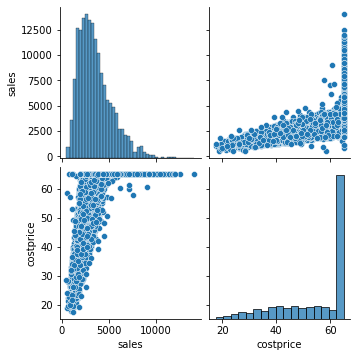

In [62]:
# Pair plot for selected numerical features
sns.pairplot(df[['sales', 'country', 'costprice']])
plt.show()


In [74]:
import plotly.express as px

# Select only numeric columns
numeric_df = df[['sales', 'costprice']]

# Create a scatter matrix (pair plot) using Plotly
fig = px.scatter_matrix(
    numeric_df,
    dimensions=numeric_df.columns,
    title="Pair Plot of Selected Numerical Features",
    labels={col: col.capitalize() for col in numeric_df.columns}  # Optional: Capitalize labels
)

# Show the interactive plot
fig.show()


### Time series Analysis

In [69]:
import plotly.express as px

# Convert date column to datetime format
df['month_id'] = pd.to_datetime(df['month_id'])

# Resample sales data by month
monthly_sales = df.set_index('month_id').resample('M')['sales'].sum().reset_index()

# Plot with Plotly
fig = px.line(
    monthly_sales,
    x='month_id', 
    y='sales',
    title="Monthly Sales Trend",
    labels={'month_id': 'Month', 'sales': 'Total Sales'}
)

# Show interactive plot
fig.show()


### Outlier Detection

In [71]:
# Adding a z-score column to detect outliers in Sales Amount
df['sales Z-Score'] = zscore(df['sales'])

# Filter out outliers
outliers = df[df['sales Z-Score'].abs() > 3]
print("Outliers:\n", outliers)


Outliers:
       ordernumber  quantityordered  priceeach  orderlinenumber     sales  \
174         10120               46      100.0                2   9264.86   
247         10127               46      100.0                2  11279.20   
361         10142               46      100.0               11   9470.94   
408         10147               48      100.0                7   9245.76   
445         10150               45      100.0                8  10993.50   
1074        10214               50      100.0                1   9534.50   
1137        10223               49      100.0                3   9774.03   
1318        10247               44      100.0                2  10606.20   
1471        10266               44      100.0               14   9160.36   
1495        10271               50      100.0                4   9169.00   
1549        10276               50      100.0                3   9631.00   
1782        10304               47      100.0                6  10172.70   
1

In [72]:
import plotly.express as px
import pandas as pd
from scipy.stats import zscore

# Assuming 'Sales Amount' is the name of the column
# Calculate Z-score for Sales Amount
df['sales Z-Score'] = zscore(df['sales'])

# Mark entries as 'Outlier' or 'Normal' based on Z-score threshold
df['Outlier'] = df['sales Z-Score'].apply(lambda x: 'Outlier' if abs(x) > 3 else 'Normal')

# Plot using Plotly
fig = px.scatter(
    df,
    x=df.index,  # Use the index for the x-axis or replace with a date column if available
    y='sales',
    color='Outlier',  # Color by 'Outlier' or 'Normal'
    title="sales with Outliers Highlighted",
    labels={'x': 'Index', 'sales': 'sales'}
)

# Show the interactive plot
fig.show()


In [73]:
import plotly.express as px
import pandas as pd
from scipy.stats import zscore

# Calculate Z-score for 'Sales Amount' to identify outliers
df['sales Z-Score'] = zscore(df['sales'])

# Filter out the outliers (keep rows with Z-score <= 3)
no_outliers = df[df['sales Z-Score'].abs() <= 3]

# Create a box plot using Plotly
fig = px.box(
    no_outliers,
    y='sales',
    title="Box Plot of sales (Without Outliers)",
    labels={'sales': 'sales'}
)

# Show the interactive plot
fig.show()


### Missing data Analysis

In [78]:
import plotly.express as px

# Calculate the count of missing values for each column
missing_values = df.isnull().sum()

# Convert the missing values into a DataFrame for easy plotting
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'Missing Values']

# Create a bar plot with Plotly
fig = px.bar(
    missing_df,
    x='Column',
    y='Missing Values',
    title="Count of Missing Values per Column",
    labels={'Missing Values': 'Count of Missing Values'},
    text='Missing Values'  # Display the count on each bar
)

# Show the interactive plot
fig.show()


In [85]:
import pandas as pd
import plotly.express as px

# Sample DataFrame creation (Replace this with your actual data)
# df = pd.DataFrame({'Customer ID': [1, 1, 2, 2, 3], 'sales': [100, 150, 200, 250, 300]})
df = pd.DataFrame({
    'Customer ID': [1, 1, 2, 2, 3, 3, 3],
    'sales': [100, 200, 300, 400, 500, 600, 700]
})  # Example data

# Calculate average sales per customer
avg_sales_per_customer = df.groupby('Customer ID')['sales'].mean().reset_index()
avg_sales_per_customer.columns = ['Customer ID', 'Average sales']  # Renaming for clarity

# Print the first few entries
print(avg_sales_per_customer.head())

# Create a bar chart using Plotly
fig = px.bar(avg_sales_per_customer, 
             x='Customer ID', 
             y='Average sales', 
             title='Average sales per Customer',
             labels={'Average sales': 'Average sales', 'Customer ID': 'Customer ID'},
             text='Average sales')  # Adding text to bars

# Show the plot
fig.show()


   Customer ID  Average sales
0            1            150
1            2            350
2            3            600


In [87]:
import pandas as pd
import plotly.express as px

# Sample DataFrame creation (Replace this with your actual data)
# Example data: Make sure the 'Date' column is in datetime format
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'sales': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550]
}
df = pd.DataFrame(data)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and day of week
df['Month'] = df['Date'].dt.month
df['Day of Week'] = df['Date'].dt.day_name()  # Get the name of the day

# Print the updated DataFrame
print(df[['Date', 'Month', 'Day of Week']])

# Create a bar chart for sales amount by month
monthly_sales = df.groupby('Month')['sales'].sum().reset_index()

# Create a bar chart using Plotly for Sales by Month
fig_monthly = px.bar(monthly_sales, 
                     x='Month', 
                     y='sales', 
                     title='Total sales by Month',
                     labels={'Month': 'Month', 'sales': 'Total sales'})

# Show the monthly sales plot
fig_monthly.show()

# Create a bar chart for sales amount by day of the week
weekly_sales = df.groupby('Day of Week')['sales'].sum().reset_index()

# Create a bar chart using Plotly for Sales by Day of Week
fig_weekly = px.bar(weekly_sales, 
                    x='Day of Week', 
                    y='sales', 
                    title='Total sales by Day of the Week',
                    category_orders={'Day of Week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']},
                    labels={'Day of Week': 'Day of the Week', 'sales Amount': 'Total sales'})

# Show the weekly sales plot
fig_weekly.show()


        Date  Month Day of Week
0 2023-01-01      1      Sunday
1 2023-01-02      1      Monday
2 2023-01-03      1     Tuesday
3 2023-01-04      1   Wednesday
4 2023-01-05      1    Thursday
5 2023-01-06      1      Friday
6 2023-01-07      1    Saturday
7 2023-01-08      1      Sunday
8 2023-01-09      1      Monday
9 2023-01-10      1     Tuesday
